In [86]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv("dataframe/champions.csv")

data = pd.get_dummies(data, columns=['Ronda'])

# Eliminar columnas irrelevantes
data = data.drop(['idPartido', 'Temporada', 'Evento', 'GolesLocal', 'GolesVisitante'], axis=1)
data.head()

# Separar características y etiquetas
X = data.drop(['VictoriaLocal', 'Empate', 'VictoriaVisitante'], axis=1)
y = data[['VictoriaLocal', 'Empate', 'VictoriaVisitante']]

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [87]:
# Convertir los datos a tensores
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [88]:
'''Ajustar los mejores parámetros para nuestra red neuronal'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir diferentes configuraciones de red y hiperparámetros
configurations = [
    {'units': 64, 'filters': 32, 'kernel_size': 3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10},
    {'units': 128, 'filters': 64, 'kernel_size': 3, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 15},
    {'units': 256, 'filters': 128, 'kernel_size': 5, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 10}
]

best_accuracy = 0
best_model = None
best_config = None

# Iterar sobre las diferentes configuraciones
for config in configurations:
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        Conv1D(config['filters'], config['kernel_size'], activation='relu'),
        MaxPooling1D(),
        Flatten(),
        Dense(config['units'], activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])

    # Compilar el modelo
    optimizer = Adam(learning_rate=config['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=config['epochs'], batch_size=config['batch_size'], validation_split=0.1)
    
    # Evaluar la precisión del modelo en el conjunto de prueba
    _, accuracy = model.evaluate(X_test, y_test)
    
    # Guardar el mejor modelo
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_config = config

# Imprimir la precisión del mejor modelo
print("Mejor configuracion:", best_config)
print("Mejor precisión en el conjunto de prueba:", best_accuracy)


Epoch 1/10


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4867 - loss: 1.0324 - val_accuracy: 0.5771 - val_loss: 0.9264
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5711 - loss: 0.9438 - val_accuracy: 0.5943 - val_loss: 0.9110
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.6019 - loss: 0.8887 - val_accuracy: 0.6286 - val_loss: 0.9049
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5949 - loss: 0.9054 - val_accuracy: 0.6171 - val_loss: 0.8868
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6223 - loss: 0.8689 - val_accuracy: 0.6229 - val_loss: 0.8946
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6077 - loss: 0.8940 - val_accuracy: 0.6171 - val_loss: 0.8857
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.6118 - loss: 0.8638 - val_accuracy: 0.6343 - val_loss: 0.8775
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.6421 - loss: 0.8368 - val_accuracy: 0.6343 - val_loss: 0.8

In [89]:
# Definir el modelo de redes neuronales convolucionales
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),  #Esta capa se utiliza para remodelar los datos de entrada para que sean compatibles con la entrada de la capa convolucional.
    tf.keras.layers.Conv1D(32, 3, activation='relu'),   #Esta es una capa convolucional unidimensional que se utiliza para extraer características de los datos de entrada.
    tf.keras.layers.MaxPooling1D(),  #Esta capa realiza el muestreo máximo (max-pooling) para reducir la dimensionalidad de las características extraídas.
    tf.keras.layers.Flatten(),   #Esta capa se utiliza para aplanar los datos en un vector unidimensional, que luego se alimenta a las capas densas.
    tf.keras.layers.Dense(64, activation='relu'),   #Capa densa (totalmente conectada) con 128 neuronas y función de activación ReLU.
    tf.keras.layers.Dropout(0.2),  #Capa de abandono (dropout) con una tasa de abandono del 20%.
    tf.keras.layers.Dense(3, activation='softmax')  # Capa de salida con 3 neuronas (una para cada clase: VictoriaLocal, Empate, VictoriaVisitante) y función de activación softmax, que produce la probabilidad de cada clase.
])

# Compilar el modelo
model.compile(optimizer = Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5159 - loss: 0.9995 - val_accuracy: 0.6114 - val_loss: 0.9390
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.6020 - loss: 0.9122 - val_accuracy: 0.5943 - val_loss: 0.9150
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.6055 - loss: 0.8899 - val_accuracy: 0.6286 - val_loss: 0.9037
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.5956 - loss: 0.8898 - val_accuracy: 0.6457 - val_loss: 0.8916
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6232 - loss: 0.8650 - val_accuracy: 0.6229 - val_loss: 0.8950
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.6192 - loss: 0.8690 - val_accuracy: 0.6229 - val_loss: 0.8976
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.6095 - loss: 0.8783 - val_accuracy: 0.5943 - val_loss: 0.8883
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.6314 - loss: 0.8656 - val_accuracy: 0.6229

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.6401 - loss: 0.8439
Loss: 0.8427138328552246
Accuracy: 0.6502002477645874
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
Confusion Matrix:
[[291  36  45]
 [ 52  31  66]
 [ 30  33 165]]


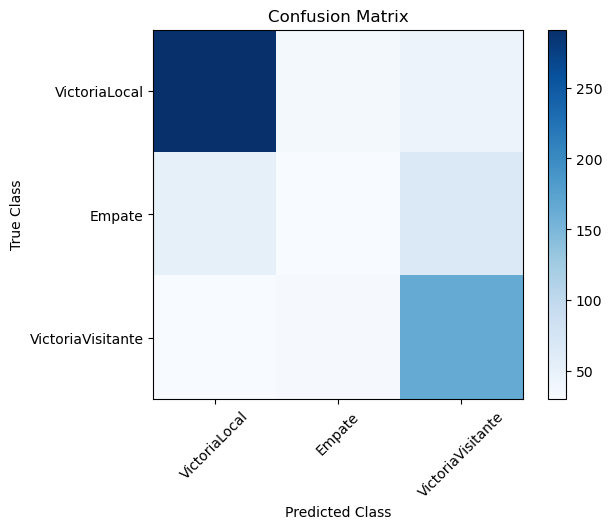

In [99]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Generar predicciones
class_probabilities = model.predict(X_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(y.columns))
plt.xticks(tick_marks, y.columns, rotation=45)
plt.yticks(tick_marks, y.columns)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


In [91]:
# Guardar el modelo
tf.keras.models.save_model(model, 'modelos/modelo_redes_CNN.keras')


In [92]:
model = tf.keras.models.load_model("modelos/modelo_redes_CNN.keras")

In [93]:
# Cargar los datos
df = pd.read_csv("dataframe/champions_23_24.csv")

df = pd.get_dummies(df, columns=['Ronda'])
df['Ronda_Semi-finals'] = False
df['Ronda_Final'] = False

# Quedarnos solo con las filas de cuartos de final
cuartos_final = df[(df['Ronda_Quarter-finals'] == 1) & (df['Temporada'] == '2023-01-01')]

# Eliminar columnas irrelevantes
cuartos_final = cuartos_final.drop(['idPartido', 'Temporada', 'Evento', 'GolesLocal', 'GolesVisitante', 'VictoriaLocal', 'VictoriaVisitante', 'Empate'], axis=1)

# Escalar características (utilizamos transform en lugar de fit_transform)
# Ajustar el escalador a los datos de entrenamiento y luego transformar los datos de cuartos de final
X_cuartos_final = scaler.fit_transform(cuartos_final)


# Convertir los datos a tensores
X_cuartos_final = tf.convert_to_tensor(X_cuartos_final, dtype=tf.float32)

X_cuartos_final.shape



TensorShape([8, 30])

In [94]:
# Hacer predicciones
predicciones_cuartos = model.predict(X_cuartos_final)

# Determinar qué equipos avanzan a las semifinales
equipos_semifinal = []
for i in range(0, len(predicciones_cuartos), 2):
    prob_eq1_gana = predicciones_cuartos[i][0]
    prob_empate = predicciones_cuartos[i][1]
    prob_eq2_gana = predicciones_cuartos[i][2]
     
    equipo_local = cuartos_final.iloc[i]['Local']
    equipo_visitante = cuartos_final.iloc[i]['Visitante']
    
    print(f"{equipo_local} vs {equipo_visitante}:")
    print(f"Probabilidad de que {equipo_local} avance: {prob_eq1_gana:.2f}")
    print(f"Probabilidad de empate: {prob_empate:.2f}")
    print(f"Probabilidad de que {equipo_visitante} avance: {prob_eq2_gana:.2f}")
    
    if prob_eq1_gana > prob_eq2_gana:
        equipos_semifinal.append(equipo_local)
    elif prob_eq2_gana > prob_eq1_gana:
        equipos_semifinal.append(equipo_visitante)
    else:
        equipos_semifinal.append("Empate")

# Imprimir el cuadro de fases de resultados de partidos
print("Cuartos de final:")
for i in range(0, len(cuartos_final), 2):
    print(f"{cuartos_final.iloc[i]['Local']} vs {cuartos_final.iloc[i]['Visitante']}: {equipos_semifinal[i//2]} avanza")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
31 vs 3:
Probabilidad de que 31 avance: 0.33
Probabilidad de empate: 0.28
Probabilidad de que 3 avance: 0.39
24 vs 14:
Probabilidad de que 24 avance: 0.90
Probabilidad de empate: 0.08
Probabilidad de que 14 avance: 0.02
5 vs 28:
Probabilidad de que 5 avance: 0.13
Probabilidad de empate: 0.23
Probabilidad de que 28 avance: 0.64
16 vs 1:
Probabilidad de que 16 avance: 0.46
Probabilidad de empate: 0.32
Probabilidad de que 1 avance: 0.22
Cuartos de final:
31 vs 3: 3 avanza
24 vs 14: 24 avanza
5 vs 28: 28 avanza
16 vs 1: 16 avanza


In [95]:
# Hacer predicciones para las semifinales basadas en los equipos que avanzaron de los cuartos de final
# Definir enfrentamientos de las semifinales basados en los equipos que avanzaron de los cuartos de final

enfrentamientos_semifinal = [(equipos_semifinal[1], equipos_semifinal[2]), (equipos_semifinal[0], equipos_semifinal[3])]
predicciones_semifinal = []
equipos_final = []

for enfrentamiento in enfrentamientos_semifinal:
    equipo1 = enfrentamiento[0]
    equipo2 = enfrentamiento[1]
    indice_equipo1 = equipos_semifinal.index(equipo1)
    indice_equipo2 = equipos_semifinal.index(equipo2)
    
    # Suponiendo que 'predicciones_cuartos' contiene las predicciones para los cuartos de final
    prob_eq1_gana = predicciones_cuartos[indice_equipo1][0]
    prob_empate = predicciones_cuartos[indice_equipo1][1]
    prob_eq2_gana = predicciones_cuartos[indice_equipo1][2]
    
    prob_eq1_gana_oponente = predicciones_cuartos[indice_equipo2][0]
    prob_empate_oponente = predicciones_cuartos[indice_equipo2][1]
    prob_eq2_gana_oponente = predicciones_cuartos[indice_equipo2][2]
    
    # Simular el enfrentamiento
    prob_eq1_gana_semifinal = prob_eq1_gana * prob_eq2_gana_oponente
    prob_empate_semifinal = prob_empate * prob_empate_oponente
    prob_eq2_gana_semifinal = prob_eq2_gana * prob_eq1_gana_oponente

    # Normalizar las probabilidades para asegurar que sumen 1
    total_probabilidades = prob_eq1_gana_semifinal + prob_empate_semifinal + prob_eq2_gana_semifinal
    prob_eq1_gana_semifinal /= total_probabilidades
    prob_empate_semifinal /= total_probabilidades
    prob_eq2_gana_semifinal /= total_probabilidades
    
    predicciones_semifinal.append([prob_eq1_gana_semifinal, prob_empate_semifinal, prob_eq2_gana_semifinal])

# Imprimir las probabilidades y los resultados de los enfrentamientos de las semifinales
print("Semifinales:")
for i, enfrentamiento in enumerate(enfrentamientos_semifinal):
    equipo1 = enfrentamiento[0]
    equipo2 = enfrentamiento[1]
    prob_eq1_gana = predicciones_semifinal[i][0]
    prob_empate = predicciones_semifinal[i][1]
    prob_eq2_gana = predicciones_semifinal[i][2]
    
    print(f"{equipo1} vs {equipo2}:")
    print(f"Probabilidad de que {equipo1} avance: {prob_eq1_gana:.2f}")
    print(f"Probabilidad de empate: {prob_empate:.2f}")
    print(f"Probabilidad de que {equipo2} avance: {prob_eq2_gana:.2f}")
    
    # Determinar quién avanza
    if prob_eq1_gana > prob_eq2_gana:
        print(f"Resultado: {equipo1} avanza\n")
        equipos_final.append(equipo1)
    elif prob_eq2_gana > prob_eq1_gana:
        print(f"Resultado: {equipo2} avanza\n")
        equipos_final.append(equipo2)
    else:
        print("Resultado: Empate\n")

Semifinales:
24 vs 28:
Probabilidad de que 24 avance: 0.05
Probabilidad de empate: 0.15
Probabilidad de que 28 avance: 0.80
Resultado: 28 avanza

3 vs 16:
Probabilidad de que 3 avance: 0.08
Probabilidad de empate: 0.29
Probabilidad de que 16 avance: 0.63
Resultado: 16 avanza



In [96]:
# Definir los enfrentamientos de la final basados en los equipos semifinalistas
enfrentamiento_final = (equipos_final[0], equipos_final[1])

# Suponiendo que 'predicciones_semifinal' contiene las predicciones para las semifinales
indice_equipo1 = equipos_semifinal.index(enfrentamiento_final[0])
indice_equipo2 = equipos_semifinal.index(enfrentamiento_final[1])

# Suponiendo que 'predicciones_semifinal' contiene las predicciones para las semifinales
prob_eq1_gana_final = predicciones_semifinal[0][0] * predicciones_semifinal[1][2]
prob_empate_final = predicciones_semifinal[0][1] * predicciones_semifinal[1][1]
prob_eq2_gana_final = predicciones_semifinal[0][2] * predicciones_semifinal[1][0]

# Normalizar las probabilidades para asegurar que sumen 1
total_probabilidades = prob_eq1_gana_final + prob_empate_final + prob_eq2_gana_final
prob_eq1_gana_final /= total_probabilidades
prob_empate_final /= total_probabilidades
prob_eq2_gana_final /= total_probabilidades

# Imprimir las probabilidades y el resultado de la final
print("Final:")
print(f"{enfrentamiento_final[0]} vs {enfrentamiento_final[1]}:")
print(f"Probabilidad de que {enfrentamiento_final[0]} avance: {prob_eq1_gana_final:.2f}")
print(f"Probabilidad de empate: {prob_empate_final:.2f}")
print(f"Probabilidad de que {enfrentamiento_final[1]} avance: {prob_eq2_gana_final:.2f}")

# Determinar quién gana la final
if prob_eq1_gana_final > prob_eq2_gana_final:
    print(f"Resultado: {enfrentamiento_final[0]} gana la final\n")
elif prob_eq2_gana_final > prob_eq1_gana_final:
    print(f"Resultado: {enfrentamiento_final[1]} gana la final\n")
else:
    print("Resultado: Empate\n")



Final:
28 vs 16:
Probabilidad de que 28 avance: 0.22
Probabilidad de empate: 0.31
Probabilidad de que 16 avance: 0.47
Resultado: 16 gana la final

